<a href="https://colab.research.google.com/github/aiformankind/covid-19-hackathon/blob/master/Covid_19_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Data Exploration

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.24.2'

Since elderly population is a high risk group, we compute the population distribution of people > 60 year old by counties in California.

We also would like to examine how many ICU beds availble by counties in California and determine how many percent of elderly population can afford an ICU bed before they have to start sharing one.

To do the study, we found a dataset from California Health and Human Service Open Data Portal which shows the bed types and bed type capacities that are associated with California healthcare facilities that are operational and have a current license issued by the CDPH and/or a current U.S. Department of Health and Human Services’ Centers for Medicare and Medicaid Services (CMS) certification. Data updated: March 10, 2020. You can find the data from below link.

https://data.chhs.ca.gov/dataset/healthcare-facility-bed-types-and-counts/resource/0997fa8e-ef7c-43f2-8b9a-94672935fa60

Disclaimer: Since we do not know the accuray of the data, we assumes no responsibility for errors or omissions. Please use this study as your own risk. AI For Mankind shall not be held liable for any use or misuse of the data. 


In [57]:
hospital_beds_df = pd.read_csv('HEALTH_FAC_BEDS_20200310.csv', skiprows=0, thousands=',')
hospital_beds_df.head()

,FACID,FACNAME,FAC_FDR,BED_CAPACITY_TYPE,BED_CAPACITY,COUNTY_NAME
0,10000001,VINEYARD POST ACUTE,SKILLED NURSING FACILITY,SKILLED NURSING,99,SONOMA
1,10000003,CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH,SKILLED NURSING FACILITY,SPECIAL TREATMENT PROGRAM,58,SONOMA
2,10000003,CREEKSIDE REHABILITATION & BEHAVIORAL HEALTH,SKILLED NURSING FACILITY,SKILLED NURSING,123,SONOMA
3,10000004,CRESCENT CITY SKILLED NURSING,SKILLED NURSING FACILITY,SKILLED NURSING,99,DEL NORTE
4,10000005,WINDSOR CARE CENTER OF PETALUMA,SKILLED NURSING FACILITY,SKILLED NURSING,79,SONOMA


Show Different Bed Types

In [4]:
hospital_beds_df['BED_CAPACITY_TYPE'].unique()

array(['SKILLED NURSING', 'SPECIAL TREATMENT PROGRAM',
       'INTERMEDIATE CARE/DD HABILITATIVE',
       'INTERMEDIATE CARE/DD NURSING',
       'CONGREGATE LIVING HEALTH FACILITY', 'INTERMEDIATE CARE',
       'HOSPICE', 'CORONARY CARE', 'INTENSIVE CARE',
       'INTENSIVE CARE NEWBORN NURSERY', 'PERINATAL',
       'UNSPECIFIED GENERAL ACUTE CARE', 'BURN', 'PEDIATRIC',
       'RENAL TRANSPLANT', 'REHABILITATION', 'ACUTE RESPIRATORY CARE',
       'ACUTE PSYCHIATRIC CARE', 'CHEMICAL DEPENDENCY RECOVERY',
       'PEDIATRIC INTENSIVE CARE UNIT', 'LABOR AND DELIVERY',
       'INTERMEDIATE CARE/DD', 'PSYCHIATRIC HEALTH',
       'PEDI. DAY & RESPITE CARE', 'DIALYSIS STATIONS',
       'CORRECTIONAL TREATMENT CENTER'], dtype=object)

Select Intensive Care or Acute Respiratory Care beds

In [5]:
icu_beds_df = hospital_beds_df[(hospital_beds_df.BED_CAPACITY_TYPE=='INTENSIVE CARE') | (hospital_beds_df.BED_CAPACITY_TYPE=='ACUTE RESPIRATORY CARE') ]
icu_beds_df.head()

,FACID,FACNAME,FAC_FDR,BED_CAPACITY_TYPE,BED_CAPACITY,COUNTY_NAME
191,30000037,METHODIST HOSPITAL OF SACRAMENTO,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,10,SACRAMENTO
212,30000108,SUTTER AMADOR HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,6,AMADOR
216,30000109,SUTTER AUBURN FAITH HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,4,PLACER
220,30000113,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,116,SACRAMENTO
227,30000114,BARTON MEMORIAL HOSPITAL,GENERAL ACUTE CARE HOSPITAL,INTENSIVE CARE,8,EL DORADO


Group ICU Beds by County

As the numbers show below: we only have limited ICU beds. For Santa Clara County, we only have 438 ICU beds.

In [6]:
icu_beds_grouped_by_county = icu_beds_df.groupby('COUNTY_NAME')['BED_CAPACITY'].sum()
sorted_icu_beds_grouped_by_county = icu_beds_grouped_by_county.sort_values(ascending=False)
sorted_icu_beds_grouped_by_county.index = sorted_icu_beds_grouped_by_county.index.str.lower()
sorted_icu_beds_grouped_by_county.index = (sorted_icu_beds_grouped_by_county.index +' county').astype(str)
sorted_icu_beds_grouped_by_county.head()

los angeles county       2145
orange county             614
san diego county          605
san bernardino county     486
santa clara county        438
Name: BED_CAPACITY, dtype: int64

Plot of Number of ICU Beds across Counties in California

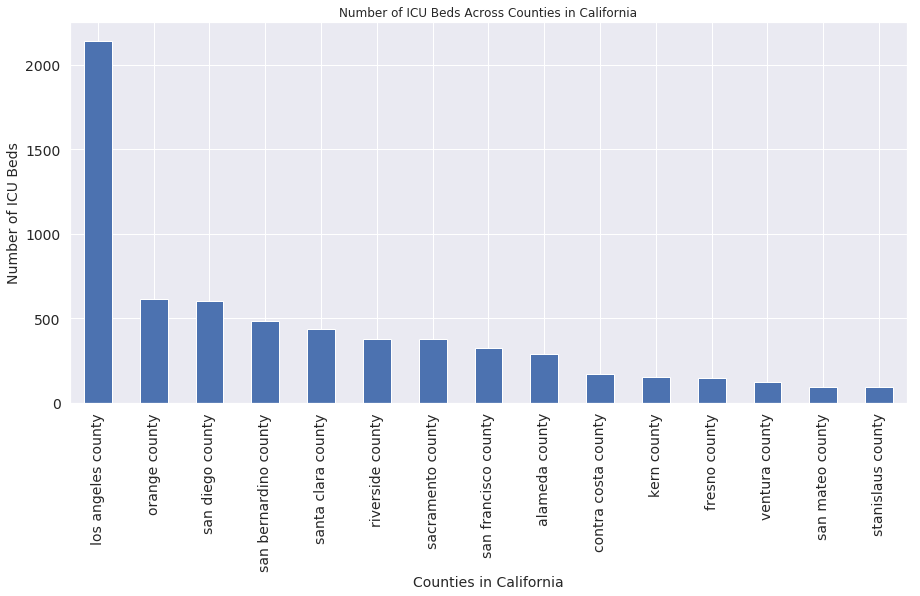

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_icu_beds_grouped_by_county.iloc[0:15].plot.bar(ax=ax)
ax.set_xlabel('Counties in California', fontsize=14)
ax.set_title('Number of ICU Beds Across Counties in California')
ax.set_ylabel('Number of ICU Beds', fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

Since elderly population is a high risk group, we compute the population distribution of people > 60 year old in California. This will help us in emergency planning.

We found a population projection dataset from California's Department of Finance. http://www.dof.ca.gov/Forecasting/Demographics/Projections/



In [61]:
county_age_df = pd.read_csv('County_Age_Projection.csv', skiprows=2, thousands=',')
county_age_df.head()

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,...,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
county_age_df = county_age_df.replace({'Age': '100+'}, '100')
pd.to_numeric(county_age_df['Age'])
pd.to_numeric(county_age_df['2020'])
county_age_df.head()

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,...,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
county_age_df['Age']=pd.to_numeric(county_age_df['Age'])

In [64]:
greater_than_sixty = county_age_df[county_age_df['Age'] >= 60]

In [65]:
greater_than_sixty[greater_than_sixty['County'].str.match('Alpine County')]['2020'].sum()

418.0

In [66]:
grouped_by_county = county_age_df[county_age_df['Age'] >= 60][['County','Age','2020']].groupby('County')['2020'].sum()
sorted_grouped_by_county = grouped_by_county.sort_values(ascending=False)

Distribution Plot of Population >= 60 year old by Counties in California

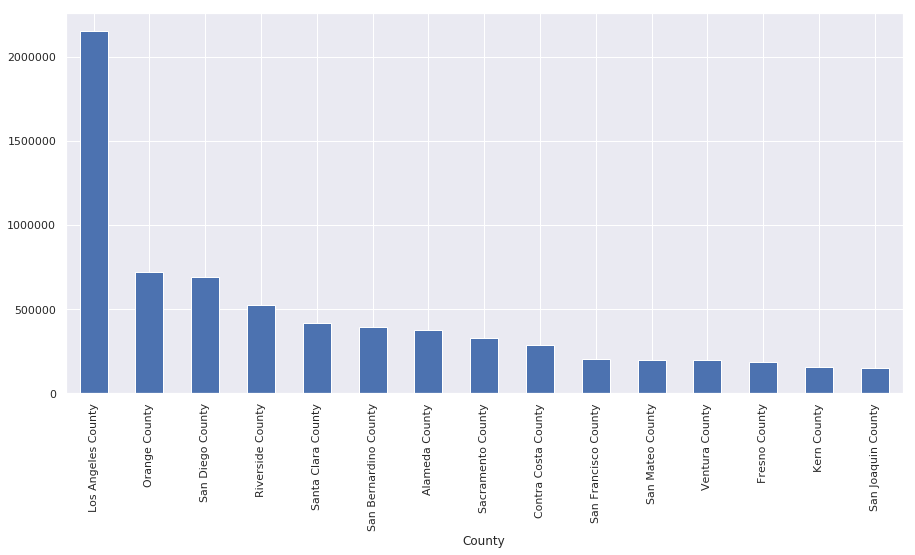

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_grouped_by_county.iloc[0:15].plot.bar(ax=ax)

We saved and uploaded the above distribution of elderly population age 60 or more across counties in CA in the repo. Checkout https://github.com/aiformankind/covid-19-hackathon/blob/master/elderly_population_by_counties_ca.csv

In [68]:
sorted_grouped_by_county_lowercase = sorted_grouped_by_county

In [69]:
sorted_grouped_by_county_lowercase.index  = sorted_grouped_by_county.index.str.lower()

In [70]:
beds_for_elderly_population = pd.merge(sorted_grouped_by_county_lowercase, sorted_icu_beds_grouped_by_county, left_index=True, right_index=True)

In [71]:
beds_for_elderly_population = beds_for_elderly_population.rename(columns={"2020": "elderly_population", "BED_CAPACITY": "num_beds"})
beds_for_elderly_population.head()

,elderly_population,num_beds
los angeles county,2152960.0,2145
orange county,717395.0,614
san diego county,688677.0,605
riverside county,525411.0,378
santa clara county,417912.0,438


This shows the max percent of elderly population who can find an available ICU bed. This is the threshold before they have to start sharing ICU beds.

In [72]:
beds_for_elderly_population['max_percent_elderly'] =  beds_for_elderly_population['num_beds'] / beds_for_elderly_population['elderly_population']*100.0
beds_for_elderly_population.head()

,elderly_population,num_beds,max_percent_elderly
los angeles county,2152960.0,2145,0.099630
orange county,717395.0,614,0.085587
san diego county,688677.0,605,0.087850
riverside county,525411.0,378,0.071944
santa clara county,417912.0,438,0.104807


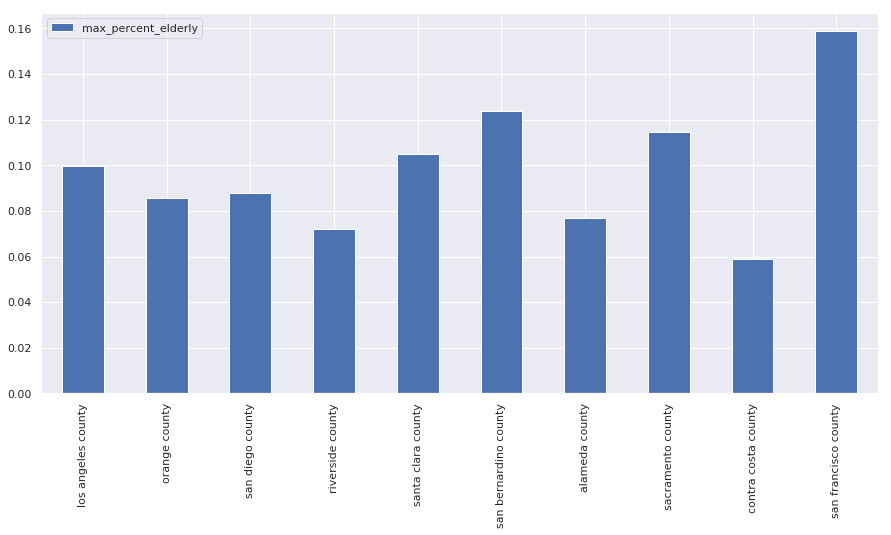

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
beds_for_elderly_population[['max_percent_elderly']].iloc[0:10].plot.bar(ax=ax)
plt.show()

In [22]:
# !pip install -U plotly
# !pip install plotly-geo
# !pip install geopandas==0.3.0
# !pip install pyshp==1.2.10
# !pip install shapely==1.6.3

In [74]:
fips_df = pd.read_csv('minoritymajority.csv')
ca_fips_df = fips_df[fips_df['STNAME'] == 'California']
joined = pd.merge(ca_fips_df[['FIPS','CTYNAME']], grouped_by_county, left_on='CTYNAME', right_on='County')

In [75]:
import numpy as np
import plotly.figure_factory as ff

values = joined['2020']
fips = joined['FIPS']

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(147, 147, 58)',
    'rgb(241, 241, 133)',
    'rgb(62, 85, 73)',
    'rgb(185, 161, 17)',
    'rgb(33, 164, 221)',
    'rgb(255, 186, 84)',
    'rgb(238, 66, 74)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[500, 10000, 20000, 50000, 100000, 200000, 300000, 500000,1000000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population', title='Population >= 60 Year Old in California'
)
fig.layout.template = None
fig.show()

![Population >= 60 Year Old](https://drive.google.com/uc?id=1MRvcj8qnKS6Es4ujLzywiqyYs2_q1jkU)

In [76]:
# !git clone https://github.com/CSSEGISandData/COVID-19

In [77]:
#!head -5 COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

In [78]:
#!head -5 COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv

In [79]:
covid_across_countries_df = pd.read_csv('COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv', skiprows=0)
covid_across_countries_df.head()

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,...,85403.0,87137.0,88948.0,90870.0,93091.0,95324.0,NaN,NaN,NaN,NaN
1,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,...,79394.0,79968.0,80174.0,80304.0,80422.0,80565.0,NaN,NaN,NaN,NaN
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,...,6009.0,7169.0,8774.0,10566.0,12669.0,14759.0,NaN,NaN,NaN,NaN
3,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,2838.0,2873.0,2915.0,2946.0,2984.0,3015.0,NaN,NaN,NaN,NaN
4,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,...,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0,NaN,NaN,NaN,NaN


In [80]:
global_timeseries = covid_across_countries_df.iloc[0].iloc[3:]
global_timeseries.head()

1/21/2020     282
1/22/2020     314
1/23/2020     581
1/24/2020     846
1/25/2020    1320
Name: 0, dtype: object

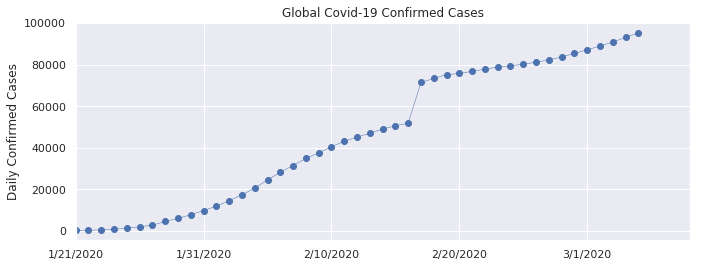

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries.plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases');

In [82]:
global_timeseries = covid_across_countries_df.iloc[[0,2]].T.iloc[3:]
global_timeseries.head()

,0,2
1/21/2020,282,4
1/22/2020,314,5
1/23/2020,581,10
1/24/2020,846,16
1/25/2020,1320,23


In [83]:
#pd.to_datetime(global_timeseries.iloc[:,0])
global_timeseries['global']=global_timeseries.iloc[:,0]
global_timeseries['USA']=global_timeseries.iloc[:,1]
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.head(5)

,global,USA
1/21/2020,282,4
1/22/2020,314,5
1/23/2020,581,10
1/24/2020,846,16
1/25/2020,1320,23


In [84]:
global_timeseries = global_timeseries.filter(regex='^((?!Unnamed).)*$', axis=0)
global_timeseries.head()

,global,USA
1/21/2020,282,4
1/22/2020,314,5
1/23/2020,581,10
1/24/2020,846,16
1/25/2020,1320,23


In [85]:
global_timeseries.index = pd.to_datetime(global_timeseries.index, errors='ignore')
global_timeseries.head(5)

,global,USA
2020-01-21,282,4
2020-01-22,314,5
2020-01-23,581,10
2020-01-24,846,16
2020-01-25,1320,23


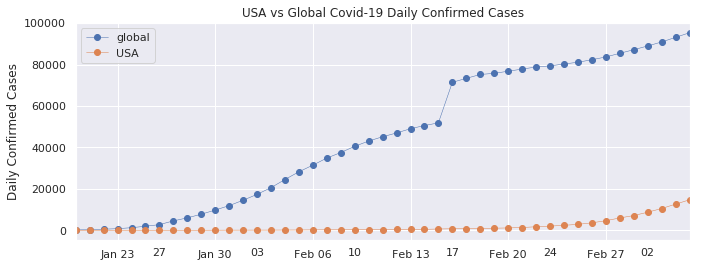

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

cols = ['global', 'USA']
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries[cols].plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('USA vs Global Covid-19 Daily Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [87]:
global_timeseries['year'] = global_timeseries.index.year
global_timeseries['month'] = global_timeseries.index.month
global_timeseries['weekday'] = global_timeseries.index.weekday_name
global_timeseries.head(5)

,global,USA,year,month,weekday
2020-01-21,282,4,2020,1,Tuesday
2020-01-22,314,5,2020,1,Wednesday
2020-01-23,581,10,2020,1,Thursday
2020-01-24,846,16,2020,1,Friday
2020-01-25,1320,23,2020,1,Saturday


In [88]:
#sns.boxplot(data=global_timeseries, x='weekday', y='global')

In [89]:
#sns.boxplot(data=global_timeseries, x='month', y='global');

In [90]:
#global_timeseries.head(10)

In [91]:
global_timeseries['date'] = global_timeseries.index.to_frame(index=True)
global_timeseries.head()

,global,USA,year,month,weekday,date
2020-01-21,282,4,2020,1,Tuesday,2020-01-21
2020-01-22,314,5,2020,1,Wednesday,2020-01-22
2020-01-23,581,10,2020,1,Thursday,2020-01-23
2020-01-24,846,16,2020,1,Friday,2020-01-24
2020-01-25,1320,23,2020,1,Saturday,2020-01-25


In [92]:
global_data = global_timeseries.rename(columns={'date': 'ds', 'global': 'y'})
global_data.head()

,y,USA,year,month,weekday,ds
2020-01-21,282,4,2020,1,Tuesday,2020-01-21
2020-01-22,314,5,2020,1,Wednesday,2020-01-22
2020-01-23,581,10,2020,1,Thursday,2020-01-23
2020-01-24,846,16,2020,1,Friday,2020-01-24
2020-01-25,1320,23,2020,1,Saturday,2020-01-25


In [93]:
# import fbprophet
# global_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
# global_prophet.fit(global_data)


In [94]:
# global_forecast = global_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# global_forecast = global_prophet.predict(global_forecast)

In [95]:
# global_prophet.plot(global_forecast, xlabel = 'Date', ylabel = 'Daily Confirmed Cases')
# plt.title('Daily Confirmed Cases Without Intervention');

In [96]:
# global_prophet.changepoints[:10]